### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [1]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


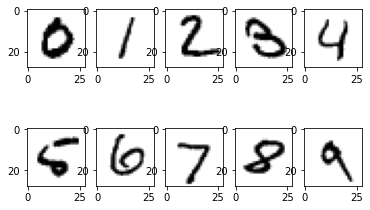

In [3]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [4]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [5]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,8,8,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

In [6]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 1.0, 3000)

Iteration:  0  Error:  4139.369837519679
Iteration:  100  Error:  1940.1869026862912
Iteration:  200  Error:  1216.757355295449
Iteration:  300  Error:  1039.2875266191793
Iteration:  400  Error:  1049.3688407120344
Iteration:  500  Error:  839.4876410657644
Iteration:  600  Error:  792.459116521187
Iteration:  700  Error:  810.3725803289101
Iteration:  800  Error:  766.6840441052891
Iteration:  900  Error:  888.8776231280926
Iteration:  1000  Error:  751.8481184241531
Iteration:  1100  Error:  754.8413426604218
Iteration:  1200  Error:  697.5427239503542
Iteration:  1300  Error:  669.9028023931586
Iteration:  1400  Error:  692.0862059202237
Iteration:  1500  Error:  657.8294384217485
Iteration:  1600  Error:  649.7747000826445
Iteration:  1700  Error:  707.1404742740268
Iteration:  1800  Error:  626.9387972351097
Iteration:  1900  Error:  650.0320759077929
Iteration:  2000  Error:  611.1370754067241
Iteration:  2100  Error:  747.3346160860187
Iteration:  2200  Error:  639.611682332216

In [7]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[ 74.   0.   0.   0.   1.   0.   4.   0.   0.   0.]
 [  0. 115.   1.   0.   0.   0.   1.   2.   0.   1.]
 [  4.   3.  89.   5.   0.   1.   1.   2.   2.   0.]
 [  1.   1.   5.  84.   0.   7.   0.   1.   1.   1.]
 [  0.   0.   1.   3.  84.   1.   0.   2.   4.  11.]
 [  0.   0.   0.   7.   1.  67.   2.   1.  11.   4.]
 [  6.   0.   5.   0.  11.   1.  77.   0.   7.   0.]
 [  0.   3.   6.   5.   0.   2.   1.  85.   2.   5.]
 [  0.   4.   9.   2.   0.   6.   1.   0.  62.   0.]
 [  0.   0.   0.   1.  13.   2.   0.   6.   0.  72.]]
The accuracy is  80.9


In [8]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [9]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [10]:
best_sizes = [784,8,8,10]
best_beta = 20
best_momentum = 0.7
best_lr = 1.0 # best learning rate
best_niterations = 3000
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4118.364357758497
Iteration:  100  Error:  2450.0383423715994
Iteration:  200  Error:  1780.4203800871655
Iteration:  300  Error:  1617.66770507558
Iteration:  400  Error:  1531.821640069549
Iteration:  500  Error:  1479.1005046512578
Iteration:  600  Error:  1381.8634584894237
Iteration:  700  Error:  1306.0128102767787
Iteration:  800  Error:  1037.5454217452318
Iteration:  900  Error:  982.8857218521653
Iteration:  1000  Error:  965.9901347479508
Iteration:  1100  Error:  906.2563955286246
Iteration:  1200  Error:  853.2153444088219
Iteration:  1300  Error:  852.4921063832935
Iteration:  1400  Error:  829.6089060273365
Iteration:  1500  Error:  812.5389354891296
Iteration:  1600  Error:  809.5227705829101
Iteration:  1700  Error:  846.4460519562641
Iteration:  1800  Error:  807.5423601436984
Iteration:  1900  Error:  813.8539113668878
Iteration:  2000  Error:  814.5497205690423
Iteration:  2100  Error:  800.9059372326626
Iteration:  2200  Error:  801.707598825

In [11]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)